# Imports

In [1]:
import os
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Importing data

In [2]:
db = json.load(open('./../data/USDA_Food_Database/foods-2011-10-03.json'))
len(db)

6636

In [3]:
nutrients = pd.DataFrame(db[0]['nutrients'])
nutrients.head()

,description,group,units,value
0,Protein,Composition,g,25.18
1,Total lipid (fat),Composition,g,29.20
2,"Carbohydrate, by difference",Composition,g,3.06
3,Ash,Other,g,3.28
4,Energy,Energy,kcal,376.00


In [4]:
info_keys = ['description', 'group', 'id', 'manufacturer']

In [5]:
info = pd.DataFrame(db, columns=info_keys)

In [6]:
info.head()

,description,group,id,manufacturer
0,"Cheese, caraway",Dairy and Egg Products,1008,
1,"Cheese, cheddar",Dairy and Egg Products,1009,
2,"Cheese, edam",Dairy and Egg Products,1018,
3,"Cheese, feta",Dairy and Egg Products,1019,
4,"Cheese, mozzarella, part skim milk",Dairy and Egg Products,1028,


In [7]:
info.group.value_counts()[:10]

Vegetables and Vegetable Products    812
Beef Products                        618
Baked Products                       496
Breakfast Cereals                    403
Legumes and Legume Products          365
Fast Foods                           365
Lamb, Veal, and Game Products        345
Sweets                               341
Fruits and Fruit Juices              328
Pork Products                        328
Name: group, dtype: int64

Get all nutrients info, not only [0] item

In [8]:
nutrients = list()
for rec in db:
    fnuts = pd.DataFrame(rec['nutrients'])
    fnuts['id'] = rec['id']
    nutrients.append(fnuts)

In [9]:
nutrients = pd.concat(nutrients, ignore_index=True)

In [10]:
nutrients.head()

,description,group,units,value,id
0,Protein,Composition,g,25.18,1008
1,Total lipid (fat),Composition,g,29.20,1008
2,"Carbohydrate, by difference",Composition,g,3.06,1008
3,Ash,Other,g,3.28,1008
4,Energy,Energy,kcal,376.00,1008


In [11]:
nutrients.duplicated().sum()

14179

In [12]:
nutrients = nutrients.drop_duplicates()

In [13]:
col_mapping = {
    'description': 'food',
    'group': 'fgroup'
}

In [14]:
info = info.rename(columns=col_mapping, copy=False)

In [15]:
info.head()

,food,fgroup,id,manufacturer
0,"Cheese, caraway",Dairy and Egg Products,1008,
1,"Cheese, cheddar",Dairy and Egg Products,1009,
2,"Cheese, edam",Dairy and Egg Products,1018,
3,"Cheese, feta",Dairy and Egg Products,1019,
4,"Cheese, mozzarella, part skim milk",Dairy and Egg Products,1028,


In [16]:
col_mapping = {
    'description': 'nutrient',
    'group': 'nutgroup'
}

In [17]:
nutrients = nutrients.rename(columns=col_mapping, copy=False)

In [18]:
nutrients.head()

,nutrient,nutgroup,units,value,id
0,Protein,Composition,g,25.18,1008
1,Total lipid (fat),Composition,g,29.20,1008
2,"Carbohydrate, by difference",Composition,g,3.06,1008
3,Ash,Other,g,3.28,1008
4,Energy,Energy,kcal,376.00,1008


In [19]:
ndata = pd.merge(nutrients, info, how='outer', on='id')

In [20]:
ndata.head()

,nutrient,nutgroup,units,value,id,food,fgroup,manufacturer
0,Protein,Composition,g,25.18,1008,"Cheese, caraway",Dairy and Egg Products,
1,Total lipid (fat),Composition,g,29.20,1008,"Cheese, caraway",Dairy and Egg Products,
2,"Carbohydrate, by difference",Composition,g,3.06,1008,"Cheese, caraway",Dairy and Egg Products,
3,Ash,Other,g,3.28,1008,"Cheese, caraway",Dairy and Egg Products,
4,Energy,Energy,kcal,376.00,1008,"Cheese, caraway",Dairy and Egg Products,


## Median value per food group and nutrient type

In [21]:
result = ndata.groupby(['nutrient', 'fgroup'])['value'].quantile(0.5)

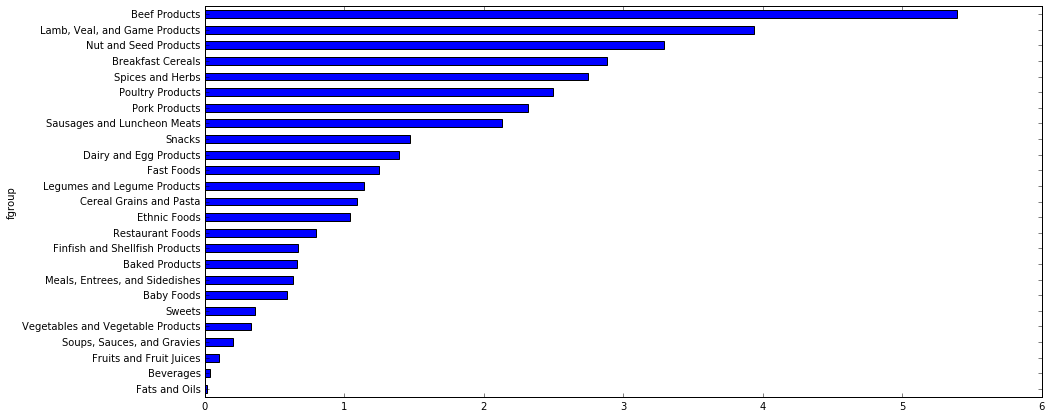

In [22]:
result['Zinc, Zn'].sort_values().plot(kind='barh', figsize=(15,7))

## Which food is the most dense in each nutrient

In [23]:
by_nutrient = ndata.groupby(['nutgroup', 'nutrient'])

In [24]:
get_maximum = lambda x: x.xs(x.value.idxmax())
get_minimum = lambda x: x.xs(x.value.idxmin())

In [25]:
max_foods = by_nutrient.apply(get_maximum)[['value', 'food']]

In [26]:
max_foods.head()

value  \
nutgroup    nutrient                
Amino Acids Alanine         8.009   
            Arginine        7.436   
            Aspartic acid  10.203   
            Cystine         1.307   
            Glutamic acid  17.452   

                                                                   food  
nutgroup    nutrient                                                     
Amino Acids Alanine                   Gelatins, dry powder, unsweetened  
            Arginine                       Seeds, sesame flour, low-fat  
            Aspartic acid                           Soy protein isolate  
            Cystine        Seeds, cottonseed flour, low fat (glandless)  
            Glutamic acid                           Soy protein isolate

In [27]:
max_foods.food = max_foods.food.str[:50]

In [28]:
max_foods.ix['Amino Acids']['food']

nutrient
Alanine                           Gelatins, dry powder, unsweetened
Arginine                               Seeds, sesame flour, low-fat
Aspartic acid                                   Soy protein isolate
Cystine                Seeds, cottonseed flour, low fat (glandless)
Glutamic acid                                   Soy protein isolate
Glycine                           Gelatins, dry powder, unsweetened
Histidine                Whale, beluga, meat, dried (Alaska Native)
Hydroxyproline    KENTUCKY FRIED CHICKEN, Fried Chicken, ORIGINA...
Isoleucine        Soy protein isolate, PROTEIN TECHNOLOGIES INTE...
Leucine           Soy protein isolate, PROTEIN TECHNOLOGIES INTE...
Lysine            Seal, bearded (Oogruk), meat, dried (Alaska Na...
Methionine                    Fish, cod, Atlantic, dried and salted
Phenylalanine     Soy protein isolate, PROTEIN TECHNOLOGIES INTE...
Proline                           Gelatins, dry powder, unsweetened
Serine            Soy protein isolate, 